In [3]:
# Standard libraries
from abc import abstractmethod
from typing import Iterable, List, Optional, Tuple  # Removed 'Type' as it is not used correctly

# Third-party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from f3dasm import ExperimentData
import l2o


2023-11-19 14:54:49,549 - f3dasm - INFO - Imported f3dasm (version: 1.4.3)


In [4]:
#show small data set input and output
# Paths to the CSV files relative to the notebook's location
input_csv_path = './small_dataset/small_dataset_input.csv'
output_csv_path = './small_dataset/small_dataset_output.csv'

# Reading the CSV files
input_df = pd.read_csv(input_csv_path)
output_df = pd.read_csv(output_csv_path)

In [5]:
input_df.head()

func_id  budget  dimensionality function_name  noise    seed
0     2198    2000               2      Thevenot    0.1  100895
1     1478    2000               2       Quartic    0.1   91077
2      130    2000               2          Levy    0.0  554703
3     2951    2000             100       Shubert    0.0  152730
4     2547    2000               2  Schwefel2_20    0.1  204304

In [6]:
output_df.head()

Unnamed: 0     path_raw     path_post
0        2198  raw/2198.nc  post/2198.nc
1        1478  raw/1478.nc  post/1478.nc
2         130   raw/130.nc   post/130.nc
3        2951  raw/2951.nc  post/2951.nc
4        2547  raw/2547.nc  post/2547.nc

In [7]:
#show input row func_id=691
input_df[input_df['func_id']==691]

func_id  budget  dimensionality function_name  noise    seed
98      691    2000              10        Ackley    0.0  504520

nvestigate the optimization data
To get familiar with the dataset, try to replicate the following experiments:
1.0 We start off by opening one of the experiments raw data of the small dataset
1.1. Choose the experiment with index 691 from the dataset. Note down the characteristics (e.g. dimen- sionality, noise level, noticeable loss-landscape characteristics). Before looking at the results: which optimizers do you expect to solve the problem with ease?

I think the ackley function is best solved by the particle swarm optimization. 
Instead of starting at one point, the particle swarm optimization has a bunch of points. They all communicate with each other to traverse the space. This decreases the risks of getting stuck in a local optimum. CMAES might also be really great. It would be 

1.2. Open the raw dataset in Python. You can use the open_one_dataset_raw() helper function.
1.3. Plot the objective values ’y’ found with the Adam optimizer for the first realization with respect to
the iteration number.
1.4. Repeat question 1.3 for the second realization. Is there a difference in the performance? If so, can you explain why?
1.5. In the figure you created in questions 1.3, overlay the objective values ’y’ found with the remaining optimizers for the first realization. Are they behaving differently?
1.6. We want to compare the best found solution at a given iteration in a so-called convergence plot. Take the cumulative minimum of the objective values with respect to the iteration number for each of the realizations. After that, take the median value over the realizations. Repeat this for every optimizer in the dataset9.
1.7. Plot the results you obtained in the previous exercise. Make sure your figure has a legend and you label each optimizer. Which optimizer is the ’winner’ and why?
1.8. Load up experiment 280 and repeat questions 1.6 and 1.7 for this dataset How do these results relate to the ’No Free Lunch’ theorem (4) ?


In [8]:
#1. We start off by opening one of the experiments raw data of the small dataset
#1.1. Choose the experiment with index 691 from the dataset. Note down the characteristics (e.g. dimen- sionality, noise level, noticeable loss-landscape characteristics). Before looking at the results: which optimizers do you expect to solve the problem with ease?
# Labels of the output data

from l2o import open_one_dataset_raw, open_one_dataset_post
from f3dasm import ExperimentData


# Labels of the output data
RAW_DATASET_LABEL = '/Users/henryjiang/Desktop/L2O/L2O/small_dataset/small_dataset'

data = ExperimentData.from_file(RAW_DATASET_LABEL)

data_691=open_one_dataset_raw(data, index=691)

In [9]:
data_691 #this is the ackley function we are working with 

<xarray.Dataset>
Dimensions:      (iterations: 2030, input_dim: 10, realization: 10,
                  optimizer: 5, output_dim: 1)
Coordinates:
  * iterations   (iterations) int32 0 1 2 3 4 5 ... 2025 2026 2027 2028 2029
  * input_dim    (input_dim) object 'x0' 'x1' 'x2' 'x3' ... 'x6' 'x7' 'x8' 'x9'
  * realization  (realization) int32 0 1 2 3 4 5 6 7 8 9
  * optimizer    (optimizer) object 'CMAES' 'PSO' 'Adam' 'LBFGSB' 'RandomSearch'
  * output_dim   (output_dim) object 'y'
Data variables:
    input        (optimizer, realization, iterations, input_dim) float64 ...
    output       (optimizer, realization, iterations, output_dim) float64 ...
Attributes:
    number_of_samples:        30
    realization_seeds:        [504520 504521 504522 504523 504524 504525 5045...
    function_seed:            504520
    function_name:            Ackley
    function_noise:           0.0
    function_dimensionality:  10
    function_global_minimum:  4.440892098500626e-16
    function_features:        noiseless,high_dimensional,seperable,differenti...

In [10]:
#show all the data for optimizer column in data_691
# Accessing a data variable named 'optimizer' directly
optimizer_data = data_691['optimizer']
print(optimizer_data)


<xarray.DataArray 'optimizer' (optimizer: 5)>
array(['CMAES', 'PSO', 'Adam', 'LBFGSB', 'RandomSearch'], dtype=object)
Coordinates:
  * optimizer  (optimizer) object 'CMAES' 'PSO' 'Adam' 'LBFGSB' 'RandomSearch'


In [11]:
# 1.3. Plot the objective values ’y’ found with the Adam optimizer for the first realization with respect to
# the iteration number.

# Selecting the data for optimizer 'Adam' and realization 0
selected_slice_0 = data_691.sel(optimizer='Adam', realization=0)

# Isolating the 'output' data variable, which we are interested in plotting
# This will automatically include 'iterations' since it's a dimension of 'output'
output_data_0 = selected_slice_0['output']

# Converting to a pandas DataFrame
output_df_0 = output_data_0.to_dataframe().reset_index()

# The DataFrame now has 'iterations' as one of the columns alongside 'output'
output_df_0

iterations output_dim  realization optimizer     output
0              0          y            0      Adam  21.651508
1              1          y            0      Adam  21.457966
2              2          y            0      Adam  21.766518
3              3          y            0      Adam  21.044868
4              4          y            0      Adam  21.898939
...          ...        ...          ...       ...        ...
2025        2025          y            0      Adam  19.660733
2026        2026          y            0      Adam  19.660733
2027        2027          y            0      Adam  19.660733
2028        2028          y            0      Adam  19.660733
2029        2029          y            0      Adam  19.660733

[2030 rows x 5 columns]

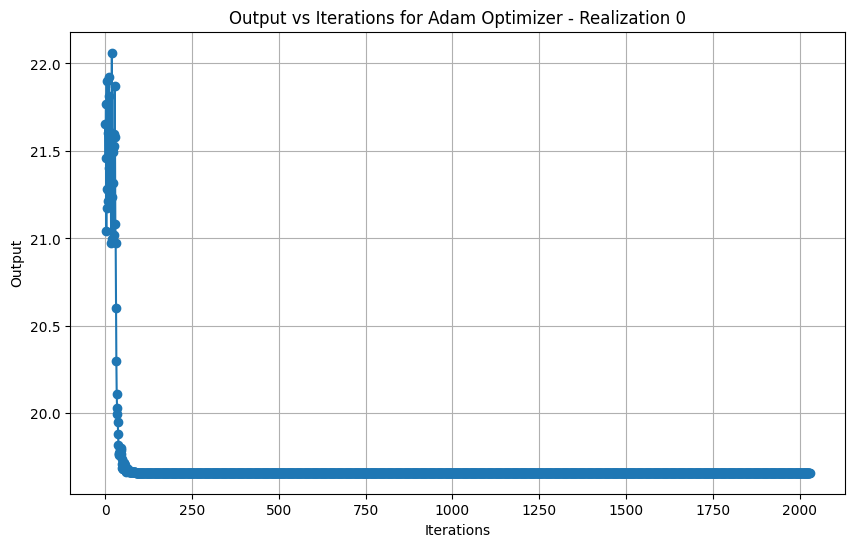

In [12]:

import matplotlib.pyplot as plt

# Plotting 'output' (y-axis) against 'iterations' (x-axis)
plt.figure(figsize=(10, 6))
plt.plot(output_df_0['iterations'], output_df_0['output'], marker='o', linestyle='-')
plt.title('Output vs Iterations for Adam Optimizer - Realization 0')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.grid(True)
plt.show()


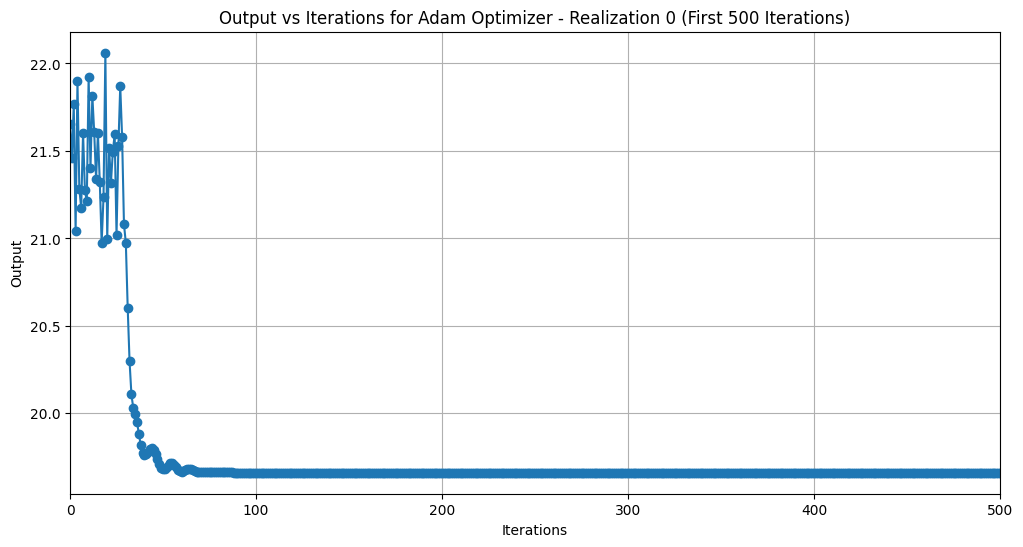

In [13]:


# Filter the DataFrame to include only the first 500 iterations
output_df_first_500 = output_df_0[output_df_0['iterations'] <= 500]

# Now plot the data
plt.figure(figsize=(12, 6))
plt.plot(output_df_first_500['iterations'], output_df_first_500['output'], marker='o', linestyle='-')
plt.title('Output vs Iterations for Adam Optimizer - Realization 0 (First 500 Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.grid(True)
plt.xlim(0, 500) # Set the limit of x-axis to show only the first 500 iterations
plt.show()


In [14]:
# 1.4. 

# Selecting the data for optimizer 'Adam' and realization 1
selected_slice_1 = data_691.sel(optimizer='Adam', realization=1)

# Isolating the 'output' data variable, which we are interested in plotting
# This will automatically include 'iterations' since it's a dimension of 'output'
output_data_1 = selected_slice_1['output']

# Converting to a pandas DataFrame
output_df_1 = output_data_1.to_dataframe().reset_index()

# The DataFrame now has 'iterations' as one of the columns alongside 'output'
output_df_1

iterations output_dim  realization optimizer     output
0              0          y            1      Adam  21.963060
1              1          y            1      Adam  20.934511
2              2          y            1      Adam  21.982420
3              3          y            1      Adam  21.430098
4              4          y            1      Adam  21.722727
...          ...        ...          ...       ...        ...
2025        2025          y            1      Adam  19.557227
2026        2026          y            1      Adam  19.557227
2027        2027          y            1      Adam  19.557227
2028        2028          y            1      Adam  19.557227
2029        2029          y            1      Adam  19.557227

[2030 rows x 5 columns]

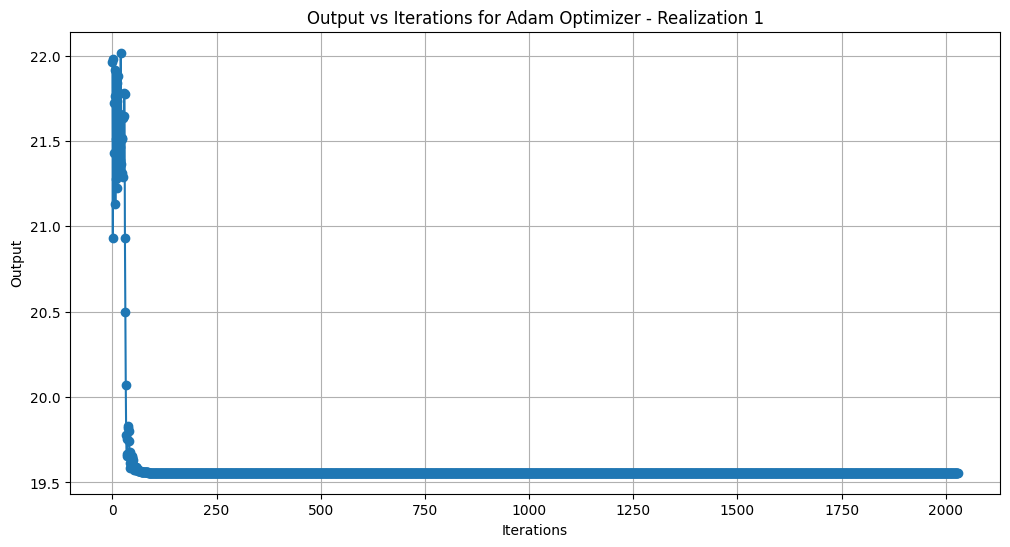

In [15]:
# Plotting 'output' (y-axis) against 'iterations' (x-axis)
plt.figure(figsize=(12, 6))
plt.plot(output_df_1['iterations'], output_df_1['output'], marker='o', linestyle='-')
plt.title('Output vs Iterations for Adam Optimizer - Realization 1')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.grid(True)
plt.show()

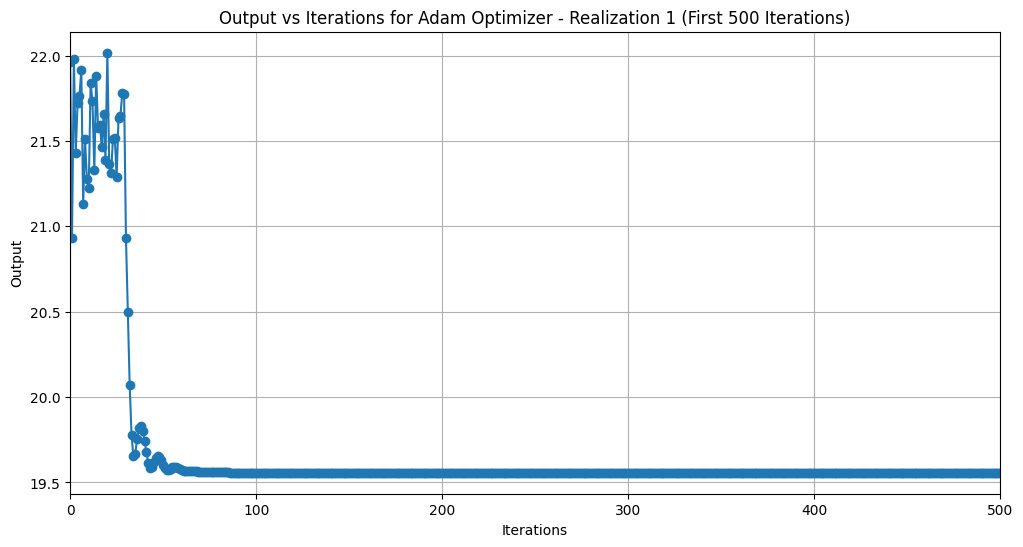

In [16]:
output_df_first_500_1 = output_df_1[output_df_1['iterations'] <= 500]

# Plotting the sliced data
plt.figure(figsize=(12, 6))
plt.plot(output_df_first_500_1 ['iterations'], output_df_first_500_1 ['output'], marker='o', linestyle='-')
plt.title('Output vs Iterations for Adam Optimizer - Realization 1 (First 500 Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.grid(True)
plt.xlim(0, 500)  # Explicitly defining the x-axis limit to focus on the first 500 iterations
plt.show()

In [17]:
#there was not a big difference between the graphs on realization 0 and 1 because in each new iteration there is a random seed and new dataset. No information is carried over.

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_691' is your xarray Dataset containing the data
# and that it includes multiple optimizer names as coordinates
optimizers = data_691.optimizer.values  # Get all optimizer names

plt.figure(figsize=(120, 80))  # Adjust the figure size as needed

# Loop through each optimizer, select the data, convert to DataFrame, and plot
for opt in optimizers:
    # Selecting the data for current optimizer and realization 0
    selected_slice = data_691.sel(optimizer=opt, realization=0)
    # Isolating the 'output' data variable
    output_data = selected_slice['output']
    # Converting to a pandas DataFrame
    output_df = output_data.to_dataframe().reset_index()
    # Plotting 'output' against 'iterations' for the current optimizer
    plt.plot(output_df['iterations'], output_df['output'], marker='o', linestyle='-', linewidth=4, markersize=12, label=opt)

# Increase the size of the title, labels, and ticks
plt.title('Output vs Iterations for All Optimizers - Realization 0', fontsize=100)
plt.xlabel('Iterations', fontsize=100)
plt.ylabel('Output', fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

# Enlarge the legend
plt.legend(prop={'size': 100})

# Increase the grid line width
plt.grid(True, linewidth=2)

plt.show()


In [19]:
#yes the optimizers are behaving very differently. CMAES is performing way better than all the other optimizers. PSO is very inconsistent, but appears to be the second best.

In [20]:
opt_list=data_691.optimizer.values

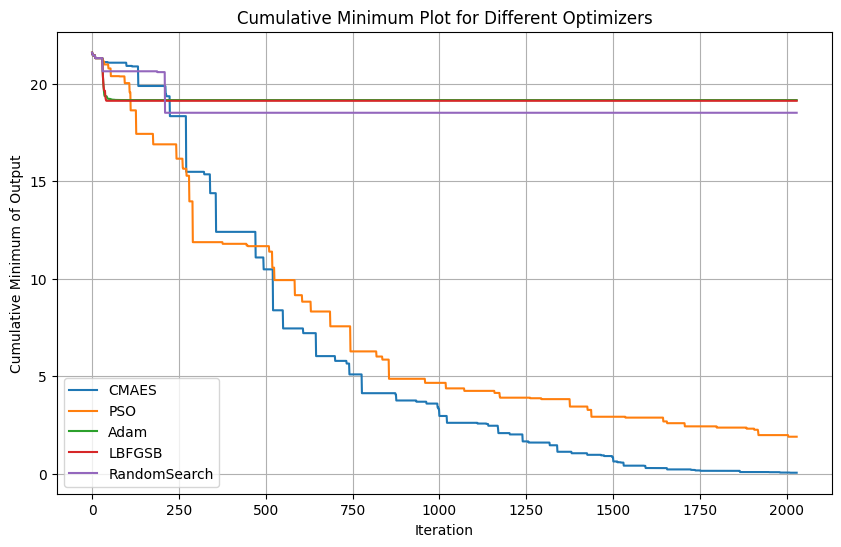

In [21]:
plt.figure(figsize=(10, 6))

for i in opt_list:
    # Selecting data for each optimizer and computing the median over realizations
    data_691_sel = data_691.sel(optimizer=i).median(dim='realization')

    # Extracting the 'output' data and converting to a NumPy array
    output_data = data_691_sel['output'].values

    # Calculating the cumulative minimum
    cummin_output = np.minimum.accumulate(output_data)

    # Plotting
    plt.plot(cummin_output, label=i)

plt.xlabel('Iteration')
plt.ylabel('Cumulative Minimum of Output')
plt.title('Cumulative Minimum Plot for Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#the best optimizer is CMAES because it had the lowest cumulative minimum.

In [23]:
#1.8. Load up experiment 280 and repeat questions 1.6 and 1.7 for this dataset How do these results relate to the ’No Free Lunch’ theorem (4) ?

data_280=open_one_dataset_raw(data, index=280)

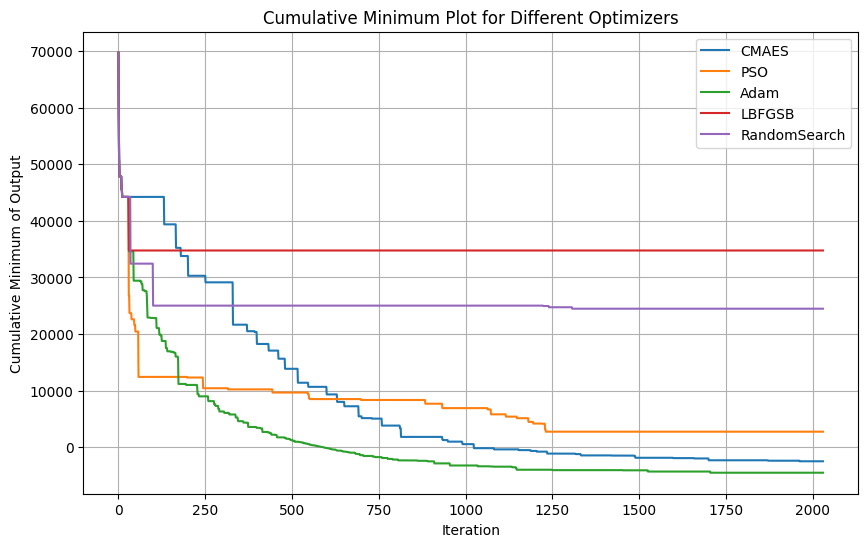

In [24]:
plt.figure(figsize=(10, 6))

for i in opt_list:
    # Selecting data for each optimizer and computing the median over realizations
    data_691_sel = data_280.sel(optimizer=i).median(dim='realization')

    # Extracting the 'output' data and converting to a NumPy array
    output_data = data_691_sel['output'].values

    # Calculating the cumulative minimum
    cummin_output = np.minimum.accumulate(output_data)

    # Plotting
    plt.plot(cummin_output, label=i)

plt.xlabel('Iteration')
plt.ylabel('Cumulative Minimum of Output')
plt.title('Cumulative Minimum Plot for Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#The best optimizer is now the adam optimizer. This pertains to the no free lunch theorem because an optimizer that is good for one function is not necessarily good for another function.


Filter on the problem characteristics
2. In order to compare the optimization performance across different problems, we have to use a performance metric. To save you the hassle of post-processing the raw data, I have already done that for you in the post files with the ’performance profile’ metric.
2.1. Load the small dataset post dataset. You can use the open_all_datasets_post() helper function.
2.2. Plot the performance profile of the small dataset. You can use the plot_perf_profile() helper
function.
2.3. Now we will be looking at particular sub-sets of the benchmark problems. We will filter the dataset
on particular problem characteristics10. Consider the following 3 filters: i. All problems that have a dimensionality that is 10 or lower
ii. All problems that are both noiseless and convex
iii. All problems that are both separable and a maximum budget of 100 iterations or lower
Plot the performance profiles of each of the three sub-sets. Can you explain the differences between the performance profiles?

In [28]:
#Load the small dataset post dataset. You can use the open_all_datasets_post() helper function.
# Labels of the output data and assuming experiment index 691
from l2o import open_all_datasets_post, plot_perf_profile
small_data_post=open_all_datasets_post(data)

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Performance ratio (f)', ylabel='Fraction of problems solved'>)

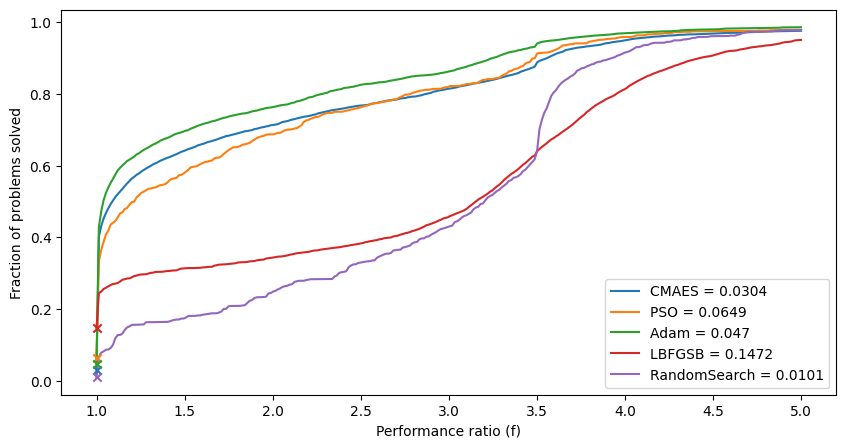

In [29]:
plot_perf_profile(small_data_post)

In [84]:
small_data_post

<xarray.Dataset>
Dimensions:         (iterations: 30, itemID: 1000, realization: 10,
                     output_dim: 1, optimizer: 5)
Coordinates:
  * iterations      (iterations) int32 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29
  * itemID          (itemID) int32 610 611 612 613 ... 29846 29847 29848 29849
  * realization     (realization) int32 0 1 2 3 4 5 6 7 8 9
  * optimizer       (optimizer) object 'CMAES' 'PSO' ... 'LBFGSB' 'RandomSearch'
  * output_dim      (output_dim) object 'y'
Data variables:
    samples_output  (itemID, realization, iterations, output_dim) float64 dask.array<chunksize=(10, 10, 30, 1), meta=np.ndarray>
    perf_profile    (itemID, optimizer, realization, output_dim) float64 dask.array<chunksize=(10, 5, 10, 1), meta=np.ndarray>
    ranking         (itemID, optimizer, output_dim) float64 dask.array<chunksize=(10, 5, 1), meta=np.ndarray>
    dim             (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    budget          (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    noise           (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    convex          (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    separable       (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    multimodal      (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>

In [81]:
# Filter the 'dim' data variable for entries that are less than 10
low_dim_ds=small_data_post.where(small_data_post['dim'] < 10)


(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Performance ratio (f)', ylabel='Fraction of problems solved'>)

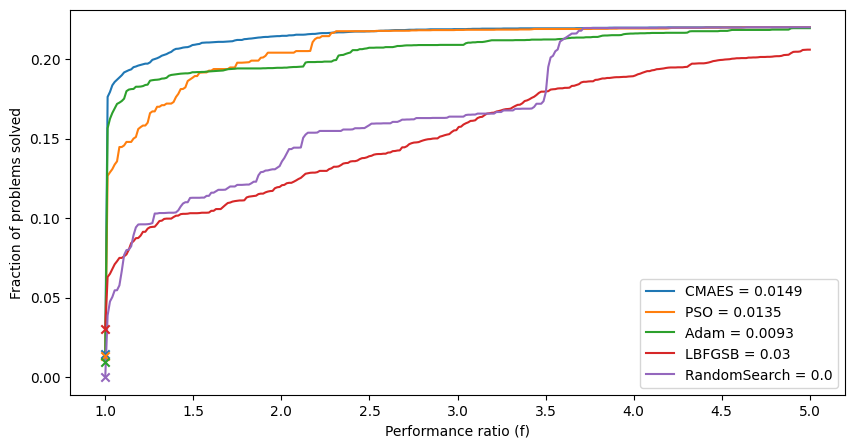

In [82]:
plot_perf_profile(low_dim_ds)

In [85]:
# All problems that are both noiseless and convex
noiseless_convex_ds=small_data_post.where((small_data_post['noise'] == 0) & (small_data_post['convex'] == True))

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Performance ratio (f)', ylabel='Fraction of problems solved'>)

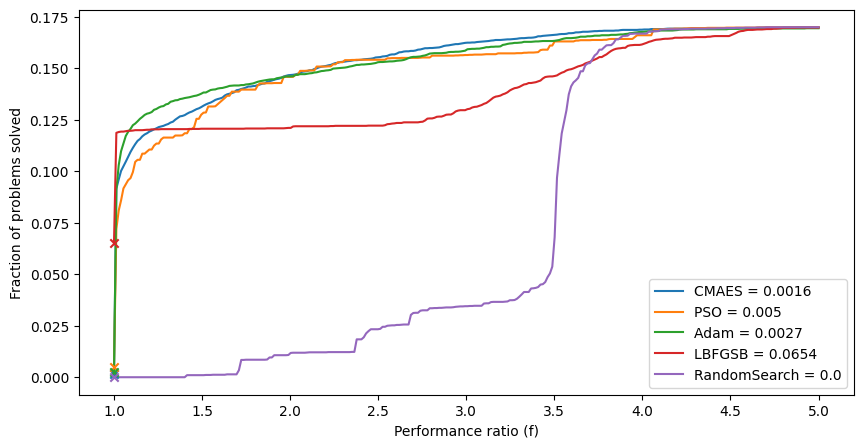

In [87]:
plot_perf_profile(noiseless_convex_ds)

In [88]:
# All problems that are both separable and a maximum budget of 100 iterations or lower
sep_low_budget_ds=small_data_post.where((small_data_post['separable'] == True) & (small_data_post['budget'] <= 100))




(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Performance ratio (f)', ylabel='Fraction of problems solved'>)

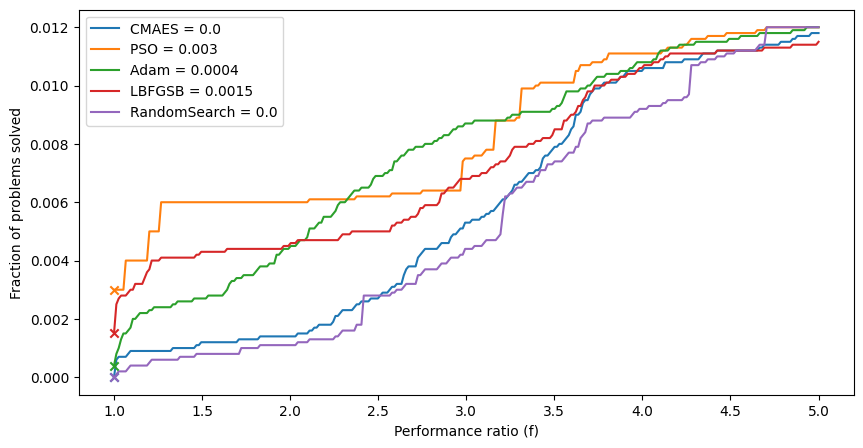

In [89]:
plot_perf_profile(sep_low_budget_ds)

In [ ]:
#Plot the performance profiles of each of the three sub-sets. Can you explain the differences between the performance profiles?
#In the whole data set, Adam solves the most amount of problems
#For low dimension problems it appears that CMAES performs the best. The performance ratio is just how much the tolerance for each optimizer compared to the current best. At 1 this means it has to be exactly the same as the best. As the value gets larger, the comparisons become more lenient.
#for noiseless and convex problems, I would say Adam is the best optimizer. It is more robust than LBFGSB when the standards are relaxed a bit. LBFGSB flatlines and doesn't improve when the standards are lowered.
#For the separable and low budget problems, PSO is the best. However, they still solve a very low amount of problems.
